In [64]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
importlib.reload(HONG)
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import pandas as pd
import seaborn as sb


mpl.style.use('report_style.mplstyle')

In [65]:
prop_committed = np.linspace(0.01, 0.2,20)
betas = np.linspace(0.05, 1, 20)
ensemble_size = 10
run_length = 10**6
qs = [0, 1]
social_structures = ['InVS15']#, 'LyonSchool', 'SFHH', 'Thiers13']

# Plotting

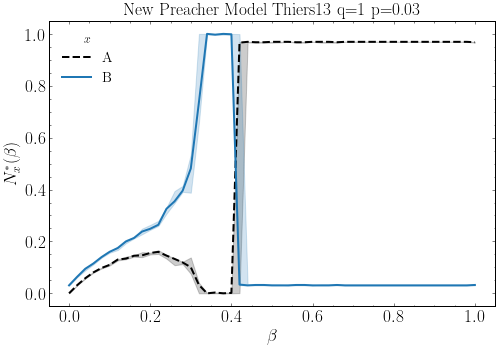

In [63]:
for social_structure in social_structures:
    
    for q in qs:

        fname_A = f'heatmap_A_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)
        fname_A = f'heatmap_A25_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A25 = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)
        fname_A = f'heatmap_A75_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A75 = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)
        fname_B = f'heatmap_B_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        fname_B = f'heatmap_B25_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B25 = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        fname_B = f'heatmap_B75_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B75 = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        
        for p in prop_committed:
            p = round(p,2)
            plt.figure()
            plt.plot(data_A.index.values, data_A[f'{p}'], color='k', linestyle='--', label='A')
            plt.fill_between(data_A.index.values, data_A25[f'{p}'], data_A75[f'{p}'], color='k', alpha=0.2)

            plt.plot(data_B.index.values, data_B[f'{p}'], color='tab:blue', label='B')
            plt.fill_between(data_B.index.values, data_B25[f'{p}'], data_B75[f'{p}'], color='tab:blue', alpha=0.2)

            plt.legend(title=r'$x$')
            plt.title(f'New Preacher Model {social_structure} q={q} p={p}')
            plt.xlabel(r'$\beta$')
            plt.ylabel(r'$N^{\ast}_{x}(\beta)$')
            plt.savefig(f'figures/fig3b_{social_structure}_{p}_q={q}_{run_length}_{ensemble_size}.pdf')
            plt.show()



# Heat Map

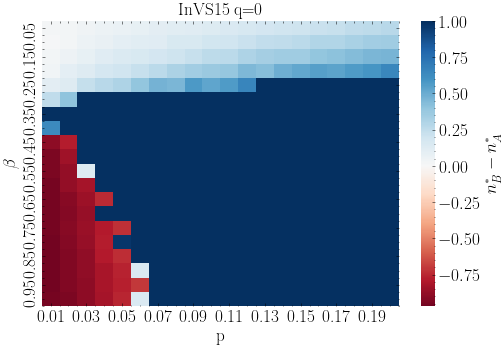

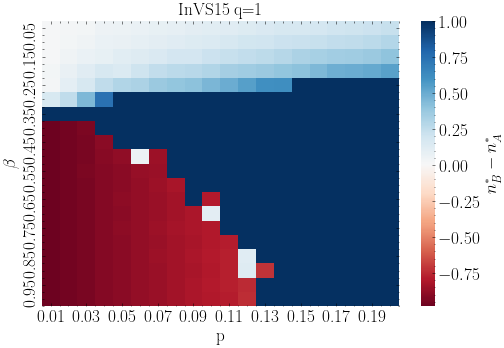

In [68]:

for social_structure in social_structures:
    
    for q in qs:

        fname_A = f'heatmap_A_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)
        fname_A = f'heatmap_A25_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A25 = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)
        fname_A = f'heatmap_A75_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A75 = pd.read_csv(f'finished_outputs/{fname_A}.csv', index_col=0)
        fname_B = f'heatmap_B_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        fname_B = f'heatmap_B25_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B25 = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        fname_B = f'heatmap_B75_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B75 = pd.read_csv(f'finished_outputs/{fname_B}.csv', index_col=0)
        

        
        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(data_B-data_A, cbar_kws={'label':r'$n_{B}^{\ast}-n_{A}^{\ast}$'}, cmap=colormap, center=0)
        plt.title(f'{social_structure} q={q}')
        plt.xlabel('p')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_res_{len(prop_committed)}x{len(betas)}_{social_structure}_{q}_{run_length}_{ensemble_size}.pdf')
        plt.show()